# Iterators and Iterables

### Iterating with a loop

In [2]:
# Create a list of strings: flash
flash = ['jay garrick', 'barry allen', 'wally west', 'barry allen']

# Print each item in flash with a for loop
for person in flash:
    print(person)
    

jay garrick
barry allen
wally west
barry allen


###  then with an iterable

In [3]:
# Create an iterable for flash: superseed
superseed = iter(flash)

# Print each item from the iterator
print(next(superseed))
print(next(superseed))
print(next(superseed))
print(next(superseed))

jay garrick
barry allen
wally west
barry allen


In [4]:
# Print all objects at once
superseed = iter(flash)
print(*superseed)

jay garrick barry allen wally west barry allen


### Iterators as function arguments

In [5]:
# Create a range object: values
values = range(10, 21)

# Print the range object
print("The range object: ", values)

# Create a list of integers: values_list
values_list = list(values)

# Print values_list
print("The values list: ", values_list)

# Get the sum of values: values_sum
values_sum = sum(values)

# Print values_sum
print("The sum of values: ", values_sum)

The range object:  range(10, 21)
The values list:  [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
The sum of values:  165


### Using enumerate

In [6]:
# Create a list of strings: mutants
mutants = ['charles xavier',
           'bobby drake',
           'kurt wagner',
           'max eisenhardt',
           'kitty pryde']

# Create and print an enumerated list of tuples: mutant_list
mutant_list = list(enumerate(mutants))
print(mutant_list)

#  Unpack and print the tuple pairs - with optional start set to 1
for index1, value1 in enumerate(mutants, start=1):
    print(index1, value1)

[(0, 'charles xavier'), (1, 'bobby drake'), (2, 'kurt wagner'), (3, 'max eisenhardt'), (4, 'kitty pryde')]
1 charles xavier
2 bobby drake
3 kurt wagner
4 max eisenhardt
5 kitty pryde


### Using zip

In [7]:
#Create a few lists: mutants, aliases, and powers
mutants = ['chuck x', 'bobby d', 'kurt w']
aliases = ['prof x', 'iceman', 'nightcrawler']
powers  = ['telepathy', 'thermokinesis', 'teleport']

# Create and print a list of tuples from mutants, aliases, and powers
mutant_data = list(zip(mutants, aliases, powers))
print(mutant_data)

# Create and print a zip object using three lists: mutant_zip
mutant_zip = zip(mutants, aliases, powers)
print(mutant_zip)

# Unpack the zip object and print the tuple values
for value1, value2, value3 in mutant_zip:
    print(value1, value2, value3)

[('chuck x', 'prof x', 'telepathy'), ('bobby d', 'iceman', 'thermokinesis'), ('kurt w', 'nightcrawler', 'teleport')]
chuck x prof x telepathy
bobby d iceman thermokinesis
kurt w nightcrawler teleport


### Using * and zip to 'unzip'

In [8]:
# Convert lists to tuples: mutant, power
mutant = tuple(mutants)
power = tuple(powers)

# Create and print a zip object from mutants and powers: z1
z1 = zip(mutant, power)
print(*z1)

# Re-create zip object from mutants and powers, b/c print exhausts the elements: z1
z1 = zip(mutant, power)

# 'Unzip' the tuples in z1 by unpacking with * and zip(): result1, result2
result1, result2 = zip(*z1)

# Check that unpacked tuples are equivalent to original tuples
print(result1 == mutant)
print(result2 == power)

('chuck x', 'telepathy') ('bobby d', 'thermokinesis') ('kurt w', 'teleport')
True
True


### Using iterators to load large files into memory

In [9]:
# Import pandas
import pandas as pd

# Initialize an empty dictionary: counts_dict
counts_dict = {}

# Iterate over the file chunk by chunk

for chunk in pd.read_csv("data/tweets.csv", chunksize=10): 
    
    # Iterate over the column in the DF
    for entry in chunk['lang']:
        if entry in counts_dict.keys():
            counts_dict[entry] += 1
        else:
            counts_dict[entry]  = 1
            
# Print the populated dictionary
print(counts_dict)

{'en': 97, 'et': 1, 'und': 2}


### Using iterators to load large files into memory USING A FUNCTION

In [16]:
# Import pandas
import pandas as pd

# Define count_entries()
def count_entries(csv_file, c_size, colname):
    """Return a dictionary with counts of occurences as value for each key"""

    # Initialize an empty dictionary: counts_dict
    counts_dict = {}

    # Iterate over the file chunk by chunk
    for chunk in pd.read_csv(csv_file, chunksize=c_size): 
    
        # Iterate over the column in the DF
        for entry in chunk[colname]:
            if entry in counts_dict.keys():
                counts_dict[entry] += 1
            else:
                counts_dict[entry]  = 1
                
        # Return counts_dict
    return counts_dict
    
# Call count_entries(): result_count
result_counts = count_entries("data/tweets.csv", 10, 'lang')
            
# Print the populated dictionary
print(result_counts)

{'en': 97, 'et': 1, 'und': 2}


# List Comprehensions and Generators

### Writing list comprehensions
#### Basic form of list comprehension: [ output-expression for iterator-variable in interable]

In [23]:
# Create list comprehension: squares
squares = [i ** 2 for i in range(10)]
print(squares)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [25]:
# Create a 5x5 matrix with nested list comprehension
matrix = [[col for col in range(5)] for row in range(5)]

# Print the matrix
for row in matrix:
    print(row)

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


### Conditionals in comprehensions

#### Basic form with a conditional, such as an if:  
#### [ output-expression + conditional-on-output for iterator-variable in interable + conditional-on-iterable]
##### Either condition can be used in the above form

In [2]:
# Create a list of strings: fellowship
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'leoglas', 'boromir', 'gimli']

# Create list comprehension: new_fellowship
new_fellowship = [member for member in fellowship if len(member) > 6]

new_fellowship

['samwise', 'aragorn', 'leoglas', 'boromir']

### Same, but with an else giving an empty string

In [33]:
# Create a list of strings: fellowship
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'leoglas', 'boromir', 'gimli']

# Create list comprehension: new_fellowship
new_fellowship = [member if len(member) > 6 else '' for member in fellowship]

new_fellowship

['', 'samwise', '', 'aragorn', 'leoglas', 'boromir', '']

### Dictionary comprehensions

In [41]:
# Create dict comprehension: new_fellowship
new_fellowship = {member: len(member) for member in fellowship}
print(new_fellowship)

{'frodo': 5, 'samwise': 7, 'merry': 5, 'aragorn': 7, 'leoglas': 7, 'boromir': 7, 'gimli': 5}


### Generator Expressions - Like a list comprehension, but is created "on the fly." To not overload memory.

In [49]:
# Generator uses () instead of []
# Create a generator object: result
result = (num for num in range(11))

# Print the first three results with next
print("Outside loop: ", next(result))
print("Outside loop: ", next(result))
print("Outside loop: ", next(result))

# Print the rest of the values
for value in result:
    print("From loop:    ", value)

Outside loop:  0
Outside loop:  1
Outside loop:  2
From loop:     3
From loop:     4
From loop:     5
From loop:     6
From loop:     7
From loop:     8
From loop:     9
From loop:     10


### Changing the output in generator expressions

In [57]:
# Create a string list: lannister
lannister = ['cersei', 'jaime', 'tywin', 'tyrion', 'joffrey']

# Create a generator object: lengths
lengths = (len(person) for person in lannister)

# Iterate over and print the values in lenghts
for value in lengths:
    print('Name length: ', value)   

Name length:  6
Name length:  5
Name length:  5
Name length:  6
Name length:  7


### Build a generator function

In [61]:
# Define a generator function get_lengths
def get_lengths(input_list):
    """Generator function that yields the length of the strings in input_list"""
    
    # Yield the length of a string
    for person in input_list:
        yield len(person)
        
# Print the values generated by get_lengths()
for value in get_lengths(lannister):
    print('Name length: ', value)

Name length:  6
Name length:  5
Name length:  5
Name length:  6
Name length:  7


### List-comprehension for extracting from a DF 

In [64]:
# Import pandas
import pandas as pd

# Import tweets.csv
df = pd.read_csv('data/tweets.csv')

# Extract the created_at column: tweet_time
tweet_time = df['created_at']

# Extract the clock time: tweet_clock_time
tweet_clock_time = [entry[11:19] for entry in tweet_time]

print(tweet_clock_time)

['23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:19', '23:40:18', '23:40:18', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23

### Same as above, but with condition of entry[17:19] == '19'

In [8]:
# Import pandas
import pandas as pd

# Import tweets.csv
df = pd.read_csv('data/tweets.csv')

# Extract the created_at column: tweet_time
tweet_time = df['created_at']

# Extract the clock time: tweet_clock_time
tweet_clock_time = [entry[11:19] for entry in tweet_time if entry[17:19] == '19']

print(tweet_clock_time)

['23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19']


# Bringing it all together - World Bank Case Study

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


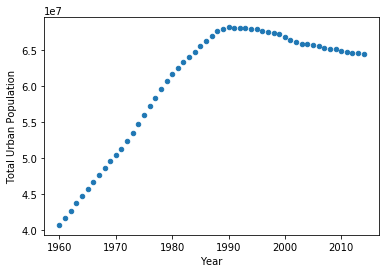

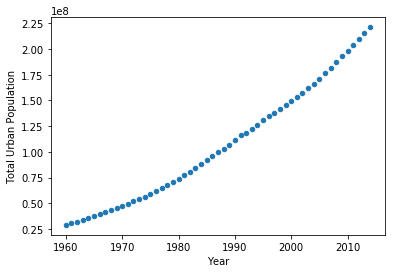

In [16]:
# Import matplotlib
import matplotlib.pyplot as plt

# Define plot_pop()
def plot_pop(filename, country_code):

    # Initialize reader object: urb_pop_reader
    urb_pop_reader = pd.read_csv(filename, chunksize=1000)

    # Initialize empty DataFrame: data
    data = pd.DataFrame()
    
    # Iterate over each DataFrame chunk
    for df_urb_pop in urb_pop_reader:
        # Check out specific country: df_pop_ceb
        df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == country_code]

        # Zip DataFrame columns of interest: pops
        pops = zip(df_pop_ceb['Total Population'],
                    df_pop_ceb['Urban population (% of total)'])
        
        # Turn zip object into list: pops_list
        pops_list = list(pops)

        # Use list comprehension to create new DataFrame column 'Total Urban Population'
        df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
        # Append DataFrame chunk to data: data
        data = data.append(df_pop_ceb)

    # Plot urban population data
    data.plot(kind='scatter', x='Year', y='Total Urban Population')
    plt.show()

# Set the filename: fn
fn = 'data/ind_pop_data.csv'

# Call plot_pop for country code 'CEB'
plot_pop(fn, 'CEB')

# Call plot_pop for country code 'ARB'
plot_pop(fn, 'ARB')

# Bringing it all together - Another Dataset Case Study

In [62]:
# First a discection of the way the above was performed, 
# then a repeat of the above ex with another dataset.
# The calculations on the boston dataset are meaningless.

In [29]:
urb_pop_reader = pd.read_csv('data/ind_pop_data.csv', chunksize=1000)

    # Initialize empty DataFrame: data
data = pd.DataFrame()
    
    # Iterate over each DataFrame chunk
for df_urb_pop in urb_pop_reader:
        # Check out specific country: df_pop_ceb
    df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

        # Zip DataFrame columns of interest: pops
    pops = zip(df_pop_ceb['Total Population'],
                    df_pop_ceb['Urban population (% of total)'])

    # Turn zip object into list: pops_list
    pops_list = list(pops)

    # Use list comprehension to create new DataFrame column 'Total Urban Population'
    df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
    # Append DataFrame chunk to data: data
    data = data.append(df_pop_ceb)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
df_pop_ceb

,CountryName,CountryCode,Year,Total Population,Urban population (% of total),Unnamed: 5,Unnamed: 6
13131,Central Europe and the Baltics,CEB,2014,103455133,62.267434,NaN,NaN


In [33]:
data.head()

,CountryName,CountryCode,Year,Total Population,Urban population (% of total),Unnamed: 5,Unnamed: 6,Total Urban Population
2,Central Europe and the Baltics,CEB,1960,91401583,44.507921,NaN,NaN,40680944
244,Central Europe and the Baltics,CEB,1961,92237118,45.206665,NaN,NaN,41697325
486,Central Europe and the Baltics,CEB,1962,93014890,45.866565,NaN,NaN,42662734
728,Central Europe and the Baltics,CEB,1963,93845749,46.534093,NaN,NaN,43670267
970,Central Europe and the Baltics,CEB,1964,94722599,47.208743,NaN,NaN,44717348


In [60]:
houses = pd.read_csv('data/boston.csv', chunksize=100)

data = pd.DataFrame()

for df_boston in houses:
    df_tax_gt_350 = df_boston[df_boston['TAX'] >= 350]
    
    areas = zip(df_tax_gt_350['CRIM'], df_tax_gt_350['MEDV'])
    
    areas_list = list(areas)
    
    df_tax_gt_350['New Column'] = [tup[0] * tup[1] for tup in areas_list]
    
    data = data.append(df_tax_gt_350)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [63]:
data.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,New Column
54,0.01360,75.0,4.00,0,0.410,5.888,47.6,7.3197,3,469.0,21.1,396.90,14.80,18.9,0.257040
74,0.07896,0.0,12.83,0,0.437,6.273,6.0,4.2515,5,398.0,18.7,394.92,6.78,24.1,1.902936
75,0.09512,0.0,12.83,0,0.437,6.286,45.0,4.5026,5,398.0,18.7,383.23,8.94,21.4,2.035568
76,0.10153,0.0,12.83,0,0.437,6.279,74.5,4.0522,5,398.0,18.7,373.66,11.97,20.0,2.030600
77,0.08707,0.0,12.83,0,0.437,6.140,45.8,4.0905,5,398.0,18.7,386.96,10.27,20.8,1.811056
